In [1]:
import pandas as pd

In [2]:
df_fake= pd.read_csv(r'F:\DS_P447\Fake.csv', encoding='ISO-8859-1')


In [3]:
df_real = pd.read_csv('F:/DS_P447/True.csv', encoding='ISO-8859-1', on_bad_lines='skip')


# BASIC INFO

Combining bith dataset for analysis

In [4]:
df_real['label']= 'Real'
df_fake['label']= 'Fake'


In [5]:
df= pd.concat([df_real,df_fake]) # concatinating two data tables

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44897 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44897 non-null  object
 1   text     44897 non-null  object
 2   subject  44897 non-null  object
 3   date     44897 non-null  object
 4   label    44897 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


In [7]:
print(df.isnull().sum())

title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [8]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real


In [9]:
df.tail()

,title,text,subject,date,label
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
23478,Sunnistan: US and Allied Safe Zone Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",Fake


# Stastistical Overview

In [10]:
df.describe()

,title,text,subject,date,label
count,44897,44897,44897,44897,44897
unique,38728,38645,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",Fake
freq,14,627,11271,182,23481


In [11]:
df['label'].value_counts()

label
Fake    23481
Real    21416
Name: count, dtype: int64

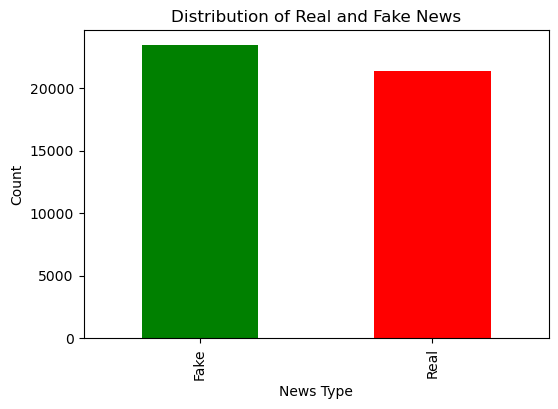

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
df['label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Real and Fake News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()

# Text Length

In [13]:
# Add a column for word count
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

In [14]:
# Summary statistics of word count
print(df.groupby('label')['word_count'].describe())

         count        mean        std  min    25%    50%    75%     max
label                                                                  
Fake   23481.0  423.197905  408.38889  0.0  240.0  363.0  506.0  8135.0
Real   21416.0  385.693173  274.05096  0.0  148.0  360.0  525.0  5172.0


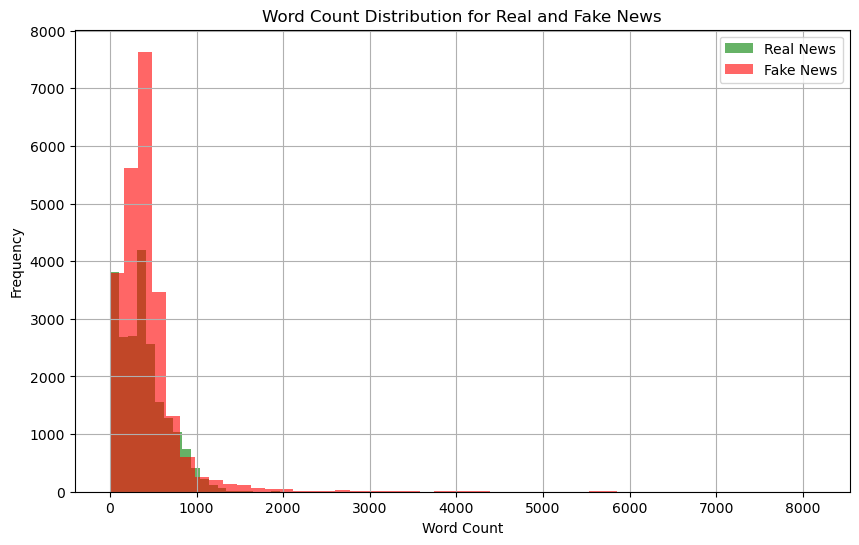

In [15]:
# Plot word count distribution
plt.figure(figsize=(10,6))
df[df['label'] == 'Real']['word_count'].hist(bins=50, alpha=0.6, color='green', label='Real News')
df[df['label'] == 'Fake']['word_count'].hist(bins=50, alpha=0.6, color='red', label='Fake News')
plt.title('Word Count Distribution for Real and Fake News')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Word Cloud for Real and Fake News
#Word clouds provide a visual summary of the most common words in the articles.

Defaulting to user installation because normal site-packages is not writeable


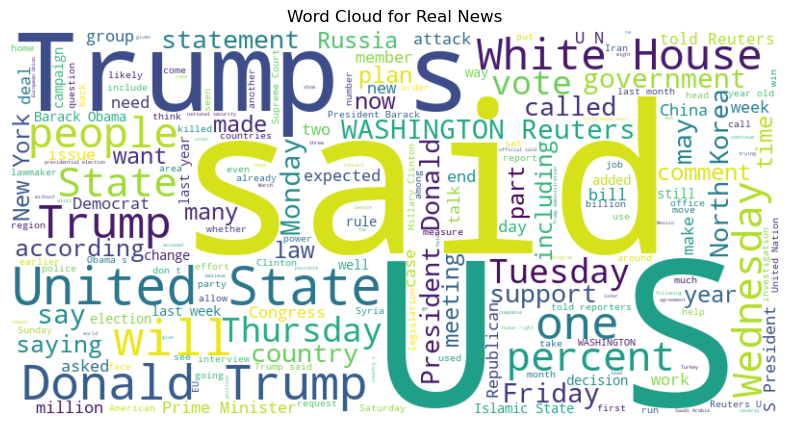

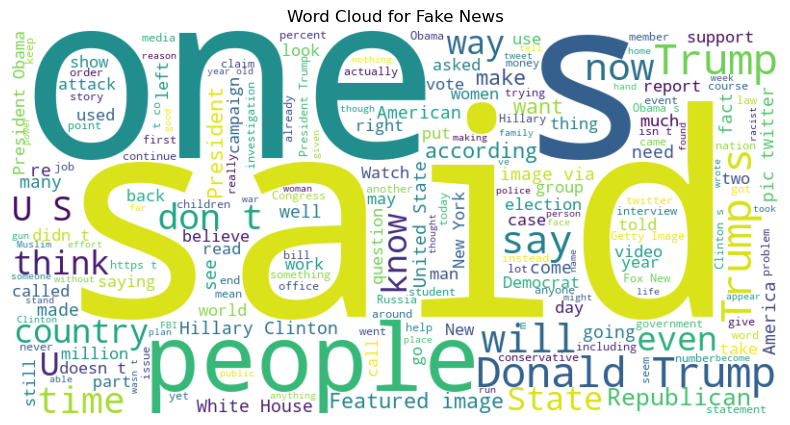

In [16]:
 !pip install wordcloud

from wordcloud import WordCloud

# Generate word cloud for Real News
real_text = " ".join(text for text in df[df['label'] == 'Real']['text'])
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)

# Generate word cloud for Fake News
fake_text = " ".join(text for text in df[df['label'] == 'Fake']['text'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)

# Plot the word clouds
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Word Cloud for Real News')
plt.axis('off')
plt.show()

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')
plt.show()


# Sentiment Analysis

In [17]:
from textblob import TextBlob

# Sentiment analysis function
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity




In [18]:
# Apply sentiment analysis
df['sentiment'] = df['text'].apply(get_sentiment)



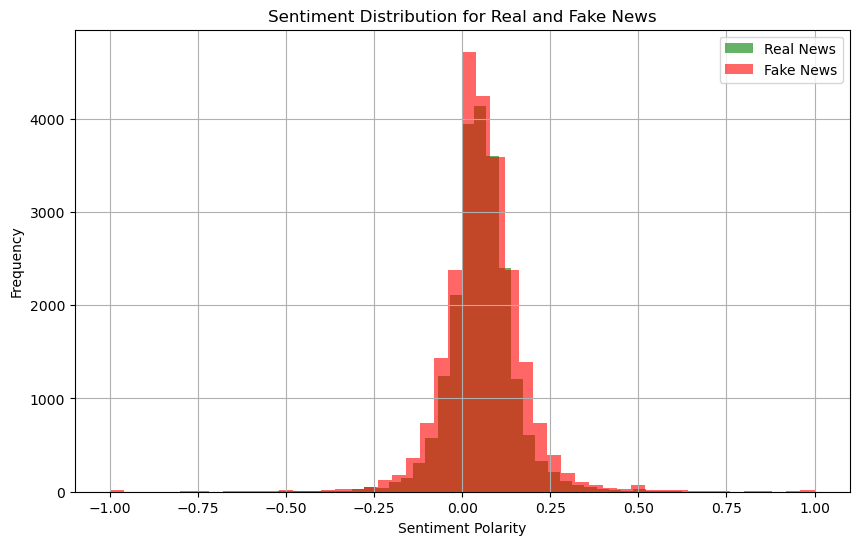

In [19]:
# Visualize the sentiment distribution
plt.figure(figsize=(10,6))
df[df['label'] == 'Real']['sentiment'].hist(bins=50, alpha=0.6, color='green', label='Real News')
df[df['label'] == 'Fake']['sentiment'].hist(bins=50, alpha=0.6, color='red', label='Fake News')
plt.title('Sentiment Distribution for Real and Fake News')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# N-Gram Analysis

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

In [21]:
# Function to get top N n-grams
def get_top_n_grams(corpus, n=None, ngram_range=(1,1)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


In [22]:
# Get most common unigrams
real_top_unigrams = get_top_n_grams(df[df['label'] == 'Real']['text'], n=20, ngram_range=(1,1))
fake_top_unigrams = get_top_n_grams(df[df['label'] == 'Fake']['text'], n=20, ngram_range=(1,1))


In [23]:
# Convert to DataFrame for visualization
real_unigrams_df = pd.DataFrame(real_top_unigrams, columns=['Unigram', 'Frequency'])
fake_unigrams_df = pd.DataFrame(fake_top_unigrams, columns=['Unigram', 'Frequency'])


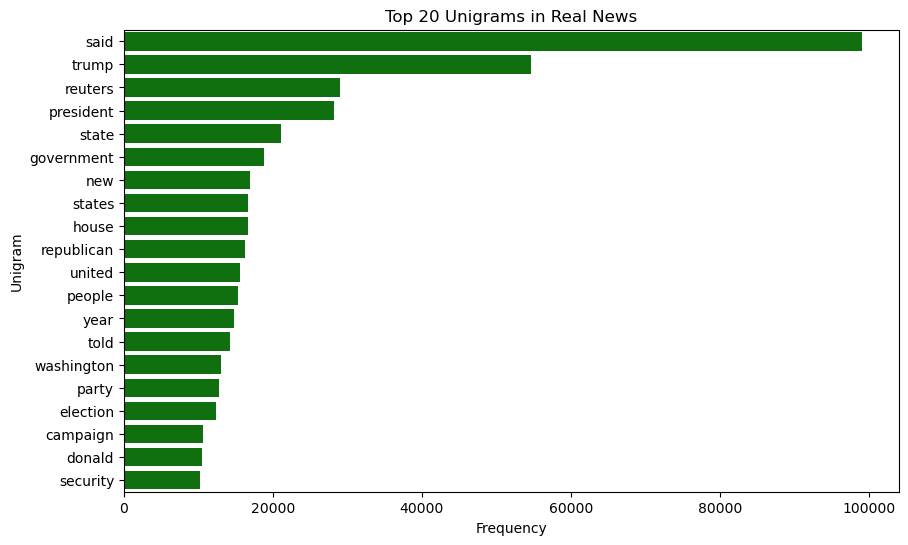

In [24]:
# Plot top unigrams
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Unigram', data=real_unigrams_df, color='green')
plt.title('Top 20 Unigrams in Real News')
plt.show()

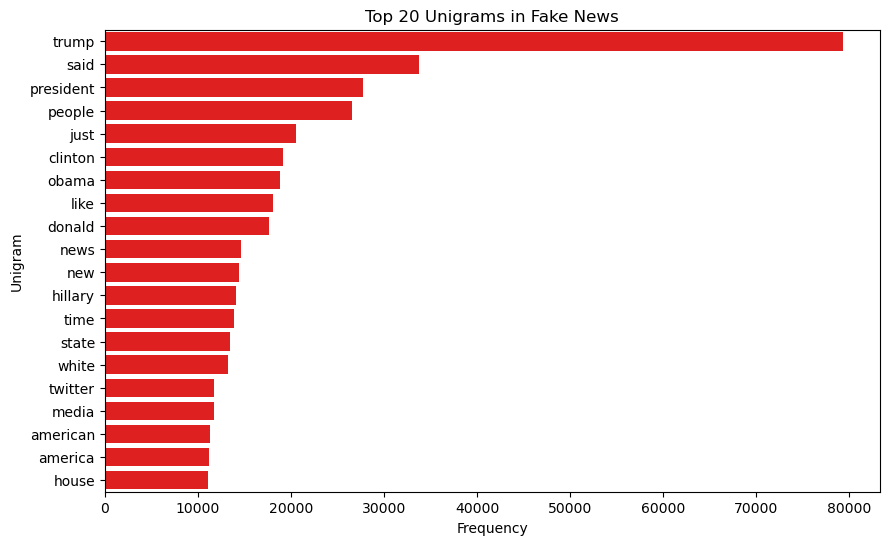

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Unigram', data=fake_unigrams_df, color='red')
plt.title('Top 20 Unigrams in Fake News')
plt.show()

In [26]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [27]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
# Text cleaning function
def clean_text(text):
    # Remove special characters, numbers, and lowercase the text
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A).lower()
    text = text.strip()
    return text

# Apply cleaning
df['cleaned_text'] = df['text'].apply(clean_text)

# Remove stopwords and apply lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['processed_text'] = df['cleaned_text'].apply(preprocess_text)



In [29]:
df['label'] = df['label'].replace({'Fake':0 ,'Real':1 })

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2784\2787764821.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace({'Fake':0 ,'Real':1 })


In [30]:

# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Limit to 5000 most common words
X = tfidf.fit_transform(df['processed_text']).toarray()
y = df['label']

print("Text processing complete.")

Text processing complete.


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [34]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:

from sklearn.metrics import precision_score, recall_score, f1_score

# Function to train, evaluate, and collect metrics
def evaluate_model_with_metrics(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)  
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return accuracy, precision, recall, f1

# Initialize an empty list to store model results
model_performance = []


In [35]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg_metrics = evaluate_model_with_metrics(log_reg, X_train, X_test, y_train, y_test)
model_performance.append(['Logistic Regression', *log_reg_metrics])



In [36]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_metrics = evaluate_model_with_metrics(rf, X_train, X_test, y_train, y_test)
model_performance.append(['Random Forest', *rf_metrics])



In [37]:
# Support Vector Machine (SVM)
svm = SVC(kernel='linear', random_state=42)
svm_metrics = evaluate_model_with_metrics(svm, X_train, X_test, y_train, y_test)
model_performance.append(['SVM', *svm_metrics])



In [38]:
# Naive Bayes
nb = MultinomialNB()
nb_metrics = evaluate_model_with_metrics(nb, X_train, X_test, y_train, y_test)
model_performance.append(['Naive Bayes', *nb_metrics])



In [39]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_metrics = evaluate_model_with_metrics(xgb, X_train, X_test, y_train, y_test)
model_performance.append(['XGBoost', *xgb_metrics])



C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [15:12:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [40]:
# Create a DataFrame with model performance
df_performance = pd.DataFrame(model_performance, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Display the DataFrame
print(df_performance)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.987602   0.984373  0.989985  0.987171
1        Random Forest  0.996956   0.996918  0.996764  0.996841
2                  SVM  0.993244   0.990796  0.995223  0.993005
3          Naive Bayes  0.932888   0.934505  0.925578  0.930020
4              XGBoost  0.995620   0.996602  0.994299  0.995449


In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()




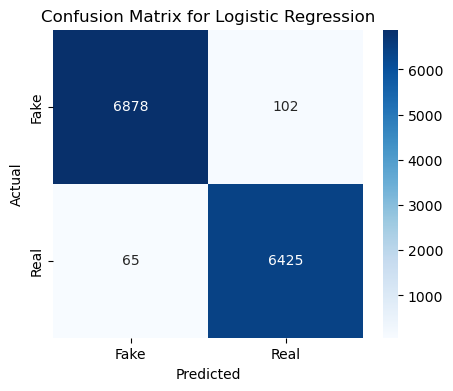

In [43]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
plot_confusion_matrix(log_reg, X_test, y_test, "Logistic Regression")



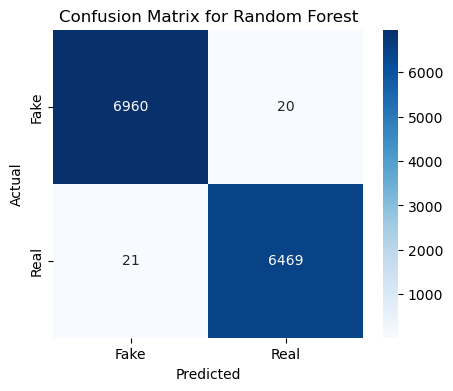

In [44]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
plot_confusion_matrix(rf, X_test, y_test, "Random Forest")



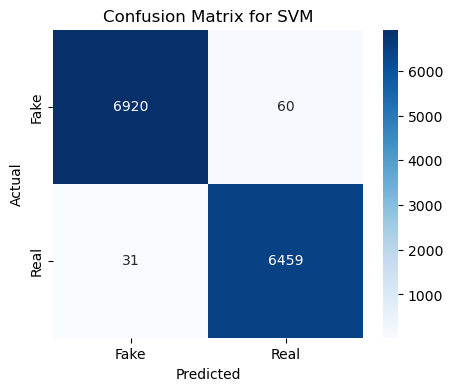

In [45]:
# Support Vector Machine (SVM)
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
plot_confusion_matrix(svm, X_test, y_test, "SVM")



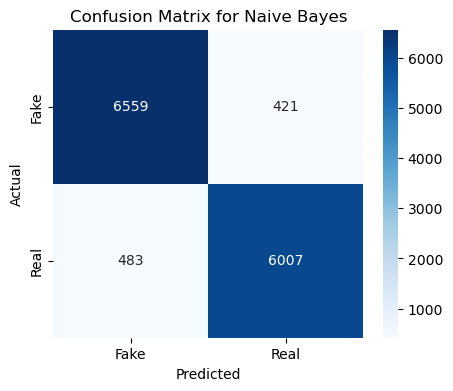

In [46]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
plot_confusion_matrix(nb, X_test, y_test, "Naive Bayes")



C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [16:35:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


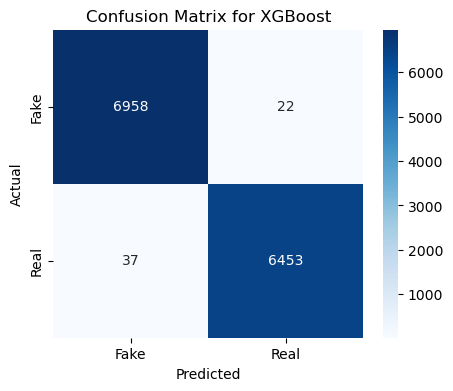

In [47]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
plot_confusion_matrix(xgb, X_test, y_test, "XGBoost")

In [48]:
import pickle

# Save Random Forest model
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!
